# CV: Timeline Visualization from Gantt Chart

In [1]:
import numpy as np
import pandas as pd
import warnings
from plotnine import *
from datetime import datetime, time
import math

In [2]:
pd.set_option('display.max_rows', 20)
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
now = datetime.now()
today = now.strftime('%Y-%m-%d')
today

'2020-04-18'

In [4]:
df = pd.read_excel('data/experience.xlsx')
df['End'] = df['End'].fillna(today)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [5]:
df

,Role,Place,Type,Start,End
0,BEng in Information Engineering,King Mongkut's Institute of Technology Ladkrabang,Academic,2014-08-01,2018-05-31
1,Data Scientist,Central Tech,Work Experience,2018-06-01,2020-04-18
2,Home Hackathon 2019 Competitor,Chula-HOME dot TECH,Extra,2019-08-24,2019-08-31
3,Techjam 2019 Final Round Competitor,KBTG,Extra,2019-11-30,2019-12-01
4,We Can Code Teens Can Code #1,Central Tech,Extra,2020-03-14,2020-03-14


In [6]:
def expand_data(df: pd.DataFrame) -> pd.DataFrame:
    cvlong = pd.DataFrame()
    num_row = df.shape[0]
    cvlong['pos'] = np.repeat(np.arange(num_row) + 1, 2)
    cvlong['name'] = np.repeat(df['Role'].values, 2)
    cvlong['type'] = np.repeat(pd.Categorical(df['Type'].values, ordered=True), 2)
    cvlong['where'] = np.repeat(df['Place'].values, 2)
    index = np.repeat(np.arange(num_row), 2)
    cvlong['value'] = [df.iloc[index[i]]['Start'] if i % 2 == 0 else df.iloc[index[i]]['End'] for i in cvlong.index]
    date = (df['Start'] + ((df['End'] - df['Start']) / 2)).dt.date
    cvlong['label_pos'] = np.repeat(date.values, 2)
    return cvlong

In [7]:
cvlong = expand_data(df)
name_order = cvlong.sort_values(['pos'], ascending=False)['name'].unique()
cvlong['name'] = pd.Categorical(cvlong['name'], categories=name_order, ordered=True)

In [8]:
cvlong

,pos,name,type,where,value,label_pos
0,1,BEng in Information Engineering,Academic,King Mongkut's Institute of Technology Ladkrabang,2014-08-01,2016-06-30
1,1,BEng in Information Engineering,Academic,King Mongkut's Institute of Technology Ladkrabang,2018-05-31,2016-06-30
2,2,Data Scientist,Work Experience,Central Tech,2018-06-01,2019-05-10
3,2,Data Scientist,Work Experience,Central Tech,2020-04-18,2019-05-10
4,3,Home Hackathon 2019 Competitor,Extra,Chula-HOME dot TECH,2019-08-24,2019-08-27
5,3,Home Hackathon 2019 Competitor,Extra,Chula-HOME dot TECH,2019-08-31,2019-08-27
6,4,Techjam 2019 Final Round Competitor,Extra,KBTG,2019-11-30,2019-11-30
7,4,Techjam 2019 Final Round Competitor,Extra,KBTG,2019-12-01,2019-11-30
8,5,We Can Code Teens Can Code #1,Extra,Central Tech,2020-03-14,2020-03-14
9,5,We Can Code Teens Can Code #1,Extra,Central Tech,2020-03-14,2020-03-14


In [9]:
maxdate = df['End'].max()
print(f"Max data in DF: {maxdate}")

Max data in DF: 2020-04-18 00:00:00


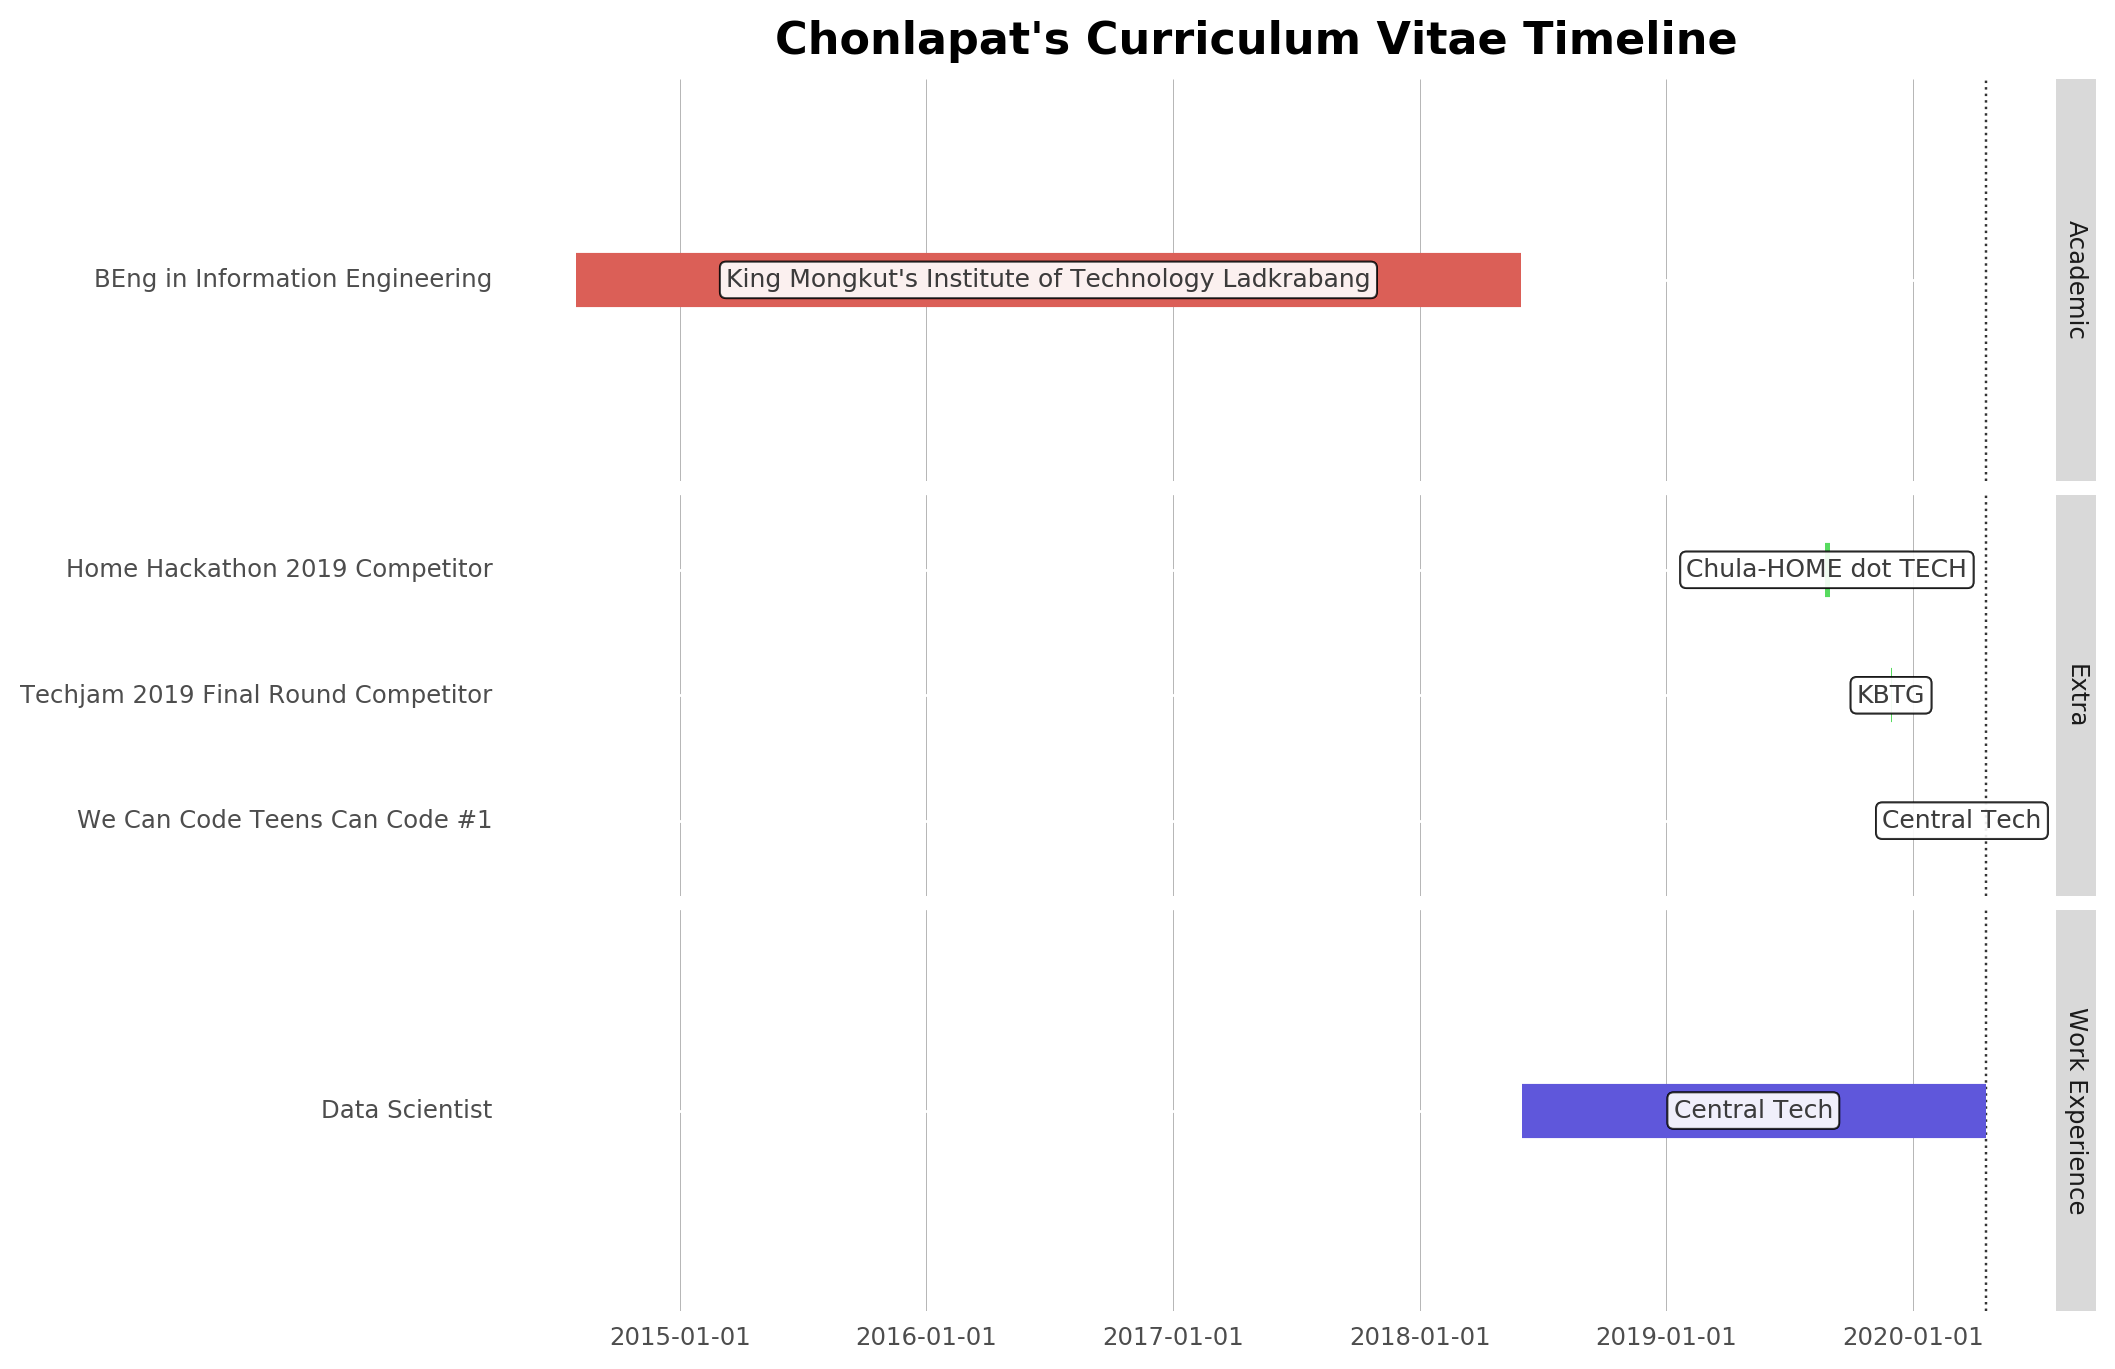

<ggplot: (-9223372036545916633)>

In [10]:
name = 'Chonlapat' #  Change to your name
g = (ggplot(cvlong, aes(x='value', y='name', label='where', group='pos')) +
    geom_vline(xintercept=maxdate, alpha=0.8, linetype='dotted') +
    labs(title=f"{name}'s Curriculum Vitae Timeline", x=None, y=None, colour=None) +
    theme(panel_background=element_rect(fill='white', colour=None),
          axis_ticks=element_blank(),
          panel_grid_major_x=element_line(size=0.25, colour='#999999'),
          plot_title=element_text(size=16, face='bold'),
          figure_size=(10, 8)))
if cvlong['type'].nunique() > 1:
    g = (g + geom_line(aes(color='type'), size=11) +
             facet_grid('type~.', scales='free', space='free') +
             guides(colour=False) +
             scale_colour_hue())
else:
    g = (g + geom_line(size=12, colour='orange'))
g = g + geom_label(aes(x='label_pos'), colour='black', size=9, alpha=0.7)
g